In [5]:
import sys
sys.path.append("..")

In [6]:
import Graph
import Skeletonize
import MNIST
from importlib import reload
from scipy.sparse import csr_matrix
import numpy as np
import os
import time
from scipy.spatial.distance import cdist

reload(Graph)
reload(Skeletonize)
reload(MNIST)

<module 'MNIST' from '..\\MNIST.py'>

In [7]:
train_x, train_Y, embedding = Graph.load_embedding(60000)
test_x, test_Y = MNIST.load_pymde_testset()

dist = cdist(test_x, train_x, metric="euclidean")

Aug 18 08:06:19 PM: Loading cached dataset.


In [8]:
spg, smap = Skeletonize.load_skeleton_and_smap(22)

In [9]:
oht = Graph.one_hot_encode_labels(train_Y)
oht, forg_indices = Graph.forget_oht_labels(oht, forget_percentage=.99)

forg_labels = np.copy(train_Y)
forg_labels[forg_indices] = -1

sparse_oht = csr_matrix(oht)

smg, slbls = Skeletonize.from_pygel_to_matrix(spg, forg_labels, smap)
prop_labels = Graph.propagate_labels(smg, slbls)
relbls = Skeletonize.remap_labels(prop_labels, smap)


true_lbls = train_Y[forg_indices]
pred_lbls = relbls[forg_indices]

reconstruction_acc = Graph.test_accuracy(true_lbls, pred_lbls)

test_acc = Graph.test_nums_accuracy(train_x, test_x, relbls, test_Y, k=12, dist=dist)


Creating matrix graph


100%|██████████| 3632/3632 [00:00<00:00, 78970.02it/s]


Creating oht label graph


100%|██████████| 60000/60000 [00:00<00:00, 2726908.88it/s]


Choosing the most present label
Propagation labels


100%|██████████| 20/20 [00:00<00:00, 66.78it/s]


Converting to csr
Remaping labels


100%|██████████| 60000/60000 [00:00<00:00, 3243561.94it/s]


Testing reconstruction accuracy
Testing testing set accuracy
Testing reconstruction accuracy


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
res = np.zeros((10, 10))
for i, j in zip(true_lbls, pred_lbls):
    res[i, j] += 1


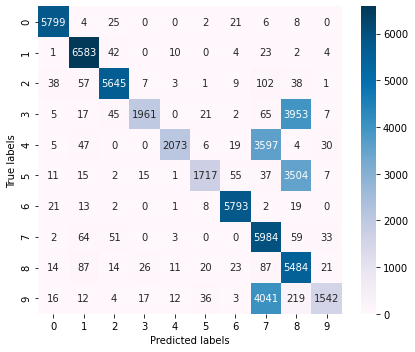

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))
sns.heatmap(res, cmap="PuBu", annot=True, fmt="g", ax=ax1)
ax1.set_ylabel("True labels")
ax1.set_xlabel("Predicted labels")

plt.tight_layout()


plt.savefig("k12heat")